In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [3]:
# Membaca dataset dari file CSV
housing = pd.read_csv('california_housing_custom_medium.csv')

In [4]:
# Memisahkan data menjadi atribut dan label
X = housing.drop('Target', axis=1)
y = housing['Target']

In [5]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Mendefinisikan model SVR
model = SVR()

In [7]:
# Mendefinisikan parameter grid
parameters = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.95, 0.005]
}

In [8]:
# Melakukan grid search untuk mencari parameter terbaik
grid_search = GridSearchCV(model, parameters)
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVR(),
             param_grid={'C': [1000, 10000, 100000],
                         'gamma': [0.5, 0.95, 0.005], 'kernel': ['rbf']})

In [9]:
# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 100000, 'gamma': 0.5, 'kernel': 'rbf'}


In [10]:
# Membuat model baru dengan parameter terbaik
best_model = SVR(**best_params)
best_model.fit(X_train, y_train)

SVR(C=100000, gamma=0.5)

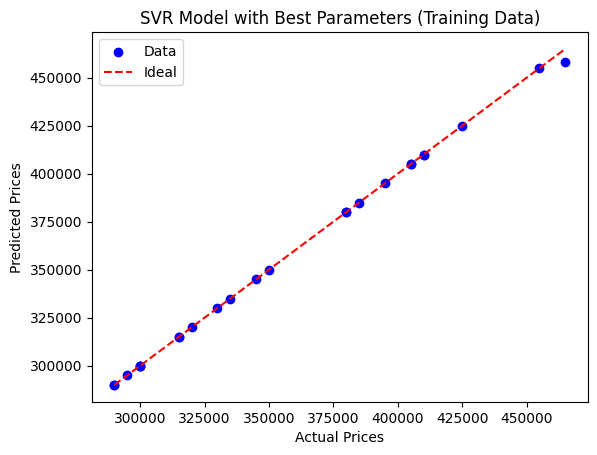

In [11]:

# Visualisasi model terhadap data latih
plt.scatter(y_train, best_model.predict(X_train), color='blue', label='Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', label='Ideal')
plt.title('SVR Model with Best Parameters (Training Data)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()